# pytorch Linear Regression 1D:Training one parameter

# Preparation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now we use a plot_diagram that help us to visualize the data space during training

In [21]:
import torch
class plot_diagram():
    def __init__(self,x,y,w,stop,go= False):
        start = w.data
        self.error = []
        self.parameter  = []
        print(type(x.numpy()))
        self.x = x.numpy()
        self.y = y.numpy()
        self.parameter_values =torch.arange(start, stop)
        self.loss_function = [criterion(forward(x),y)for w.data in self.parameter_values]
        w.data = start

        def __call__(self,Yhat,w,error,n):
            self.error.append(error)
            self.parameter.append(w.data)
            plt.subplot(214)
            plt.plot(self.x,Yhat.detach().numpy())
            plt.plot(self.x,self.y,'ro')
            plt.xlabel("parameter")
            plt.ylim(-20,20)
            plt.subplot(212)
            plt.title("data space")

            parameter_values_tensor = torch.tensor(self.parameter_values)
            loss_function_tensor = torch.tensor(self.loss_function)
            plt.plot(parameter_values_tensor,loss_function_tensor)
            plt.plot(self.parameter,self.error,'ro')
            plt.xlabel("parameter")
            plt.figure()

            def __del__(self):
                plt.close('all')

# Make some data

In [22]:

x = torch.arange(-3 , 3 , 0.1).view(-1,1)
f = -3*x

In [23]:
# Now we will plot line

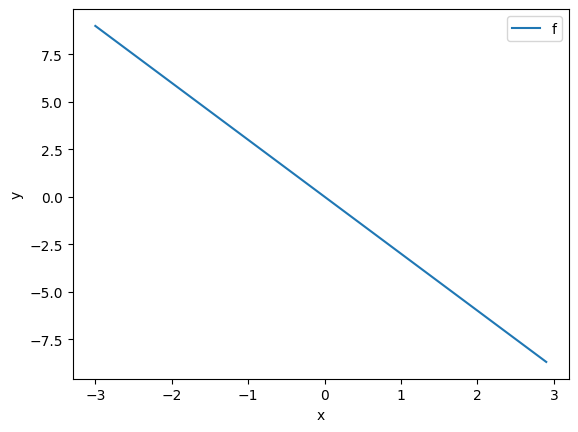

In [24]:
plt.plot(x.numpy(),f.numpy(),label = "f")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

now we use torch.randn()method to add some noise to our data

In [25]:
y = f + 0.2*torch.randn(x.size())

### Plot Y


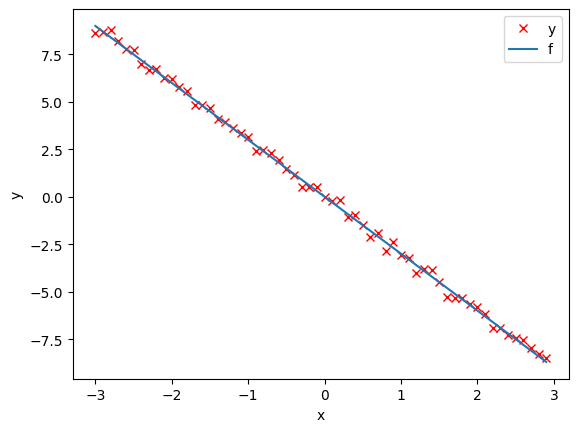

In [26]:
plt.plot(x.numpy(),y.numpy(),'rx',label = "y")
plt.plot(x.numpy(),f.numpy(),label = "f")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Create the model and cost function

In [27]:
def forward(x):
    return w * x

now define the cost or criterion function using mean square error(MSE)

In [33]:
def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

#### now define the learning rate and an empty list LOSS to record the loss for each iteration

In [34]:
lr = 0.1
LOSS = []

In [35]:
w = torch.tensor(-10.0,requires_grad=True)

### create a plot_diagram object to visualize the data space and the parameter space for each iteration during training

In [36]:
gradient_plot = plot_diagram(x,y,w,stop=5)

<class 'numpy.ndarray'>


# Train the model

In [51]:
def train_model(iter):
    for epoch in range(iter):
        # make the predictions
        Yhat = forward(x)
        # calculate the loss
        loss = criterion(Yhat, y)
        
        # Debugging prints
        print(f"Yhat type: {type(Yhat)}, shape: {Yhat.shape if hasattr(Yhat, 'shape') else 'N/A'}")
        print(f"w type: {type(w)}, shape: {w.shape if hasattr(w, 'shape') else 'N/A'}")
        print(f"loss.item() type: {type(loss.item())}")
        print(f"epoch type: {type(epoch)}")
        
        # plot the diagram
        gradient_plot.plot(Yhat, w, loss.item(), epoch)
        #store the loss into list
        LOSS.append(loss.item())
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        LOSS.backward()
        #update paramters
        w.data = w.data - lr * w.grad.data
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

In [52]:
train_model(4)

Yhat type: <class 'torch.Tensor'>, shape: torch.Size([60, 1])
w type: <class 'torch.Tensor'>, shape: torch.Size([])
loss.item() type: <class 'float'>
epoch type: <class 'int'>


AttributeError: 'plot_diagram' object has no attribute 'plot'

Text(22.472222222222214, 0.5, 'Cost')

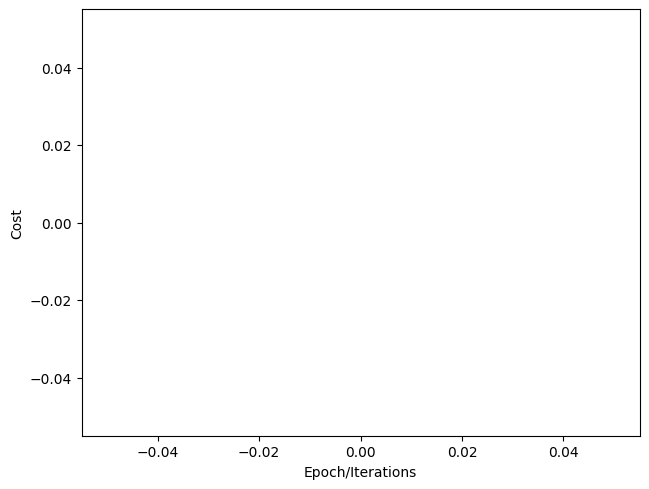

In [53]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")